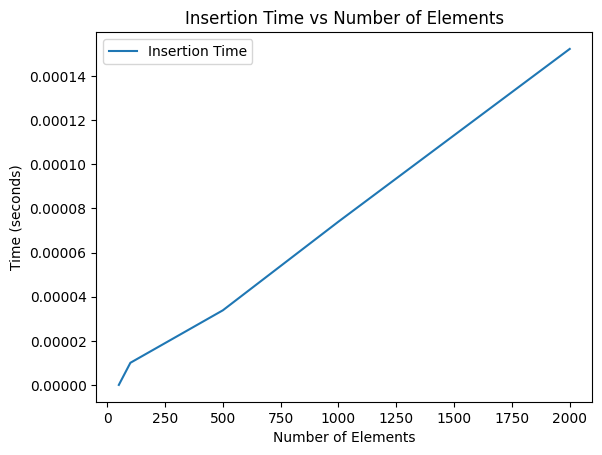

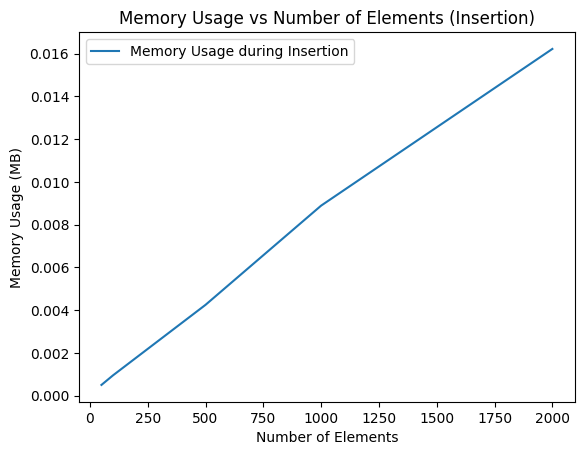

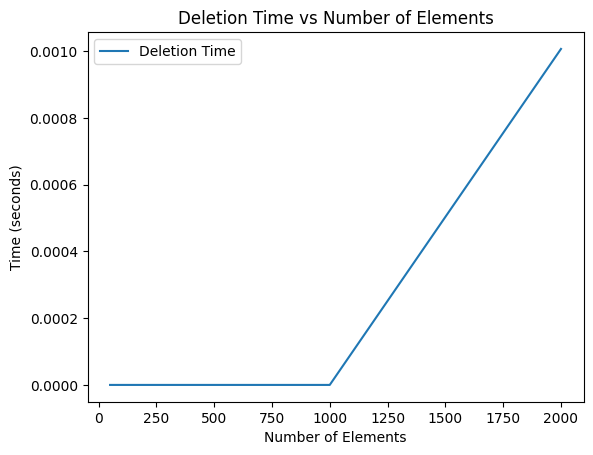

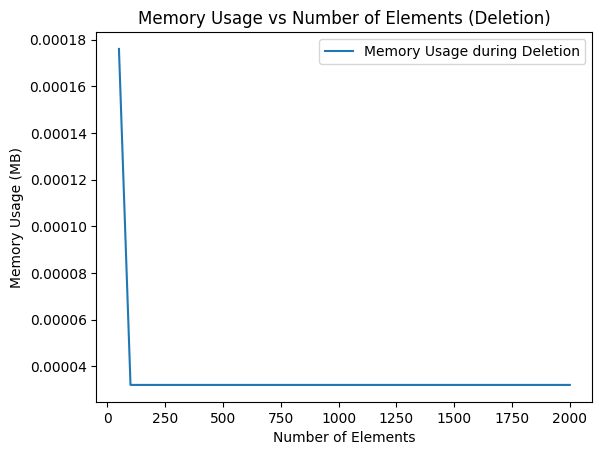

In [5]:
import time
import tracemalloc
import matplotlib.pyplot as plt

class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        if self.root is None:
            self.root = TreeNode(value)
        else:
            self._insert_recursively(self.root, value)

    def _insert_recursively(self, node, value):
        if value < node.value:
            if node.left is None:
                node.left = TreeNode(value)
            else:
                self._insert_recursively(node.left, value)
        elif value > node.value:
            if node.right is None:
                node.right = TreeNode(value)
            else:
                self._insert_recursively(node.right, value)

    def delete(self, value):
        self.root = self._delete_recursively(self.root, value)

    def _delete_recursively(self, node, value):
        if node is None:
            return node
        
        if value < node.value:
            node.left = self._delete_recursively(node.left, value)
        elif value > node.value:
            node.right = self._delete_recursively(node.right, value)
        else:
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left
            
            temp = self._min_value_node(node.right)
            node.value = temp.value
            node.right = self._delete_recursively(node.right, temp.value)
        
        return node

    def _min_value_node(self, node):
        current = node
        while current.left is not None:
            current = current.left
        return current

# Функція для вимірювання часу і пам'яті
def measure_performance(tree, elements, operation):
    times = []
    memory_usage = []
    for element in elements:
        start_time = time.time()
        tracemalloc.start()
        
        if operation == "insert":
            tree.insert(element)
        elif operation == "delete":
            tree.delete(element)
        
        end_time = time.time()
        times.append(end_time - start_time)
        
        current, peak = tracemalloc.get_traced_memory()
        memory_usage.append(peak / 10**6)  # Convert bytes to megabytes
        tracemalloc.stop()
    return times, memory_usage

# Приклад використання:
sizes = [50, 100, 500, 1000, 2000]
insertion_times_all = []
memory_usage_insert_all = []
deletion_times_all = []
memory_usage_delete_all = []

for size in sizes:
    bst = BinarySearchTree()
    elements = list(range(1, size + 1))
    
    # Вставка елементів
    insertion_times, memory_usage_insert = measure_performance(bst, elements, "insert")
    insertion_times_all.append(sum(insertion_times) / size)  # Середній час вставки
    memory_usage_insert_all.append(max(memory_usage_insert))  # Максимальне використання пам'яті під час вставки
    
    # Видалення останнього елементу
    deletion_times, memory_usage_delete = measure_performance(bst, [elements[-1]], "delete")
    deletion_times_all.append(sum(deletion_times))  # Час видалення
    memory_usage_delete_all.append(max(memory_usage_delete))  # Максимальне використання пам'яті під час видалення

# Побудова графіків для вставки
plt.plot(sizes, insertion_times_all, label='Insertion Time')
plt.xlabel('Number of Elements')
plt.ylabel('Time (seconds)')
plt.title('Insertion Time vs Number of Elements')
plt.legend()
plt.show()

plt.plot(sizes, memory_usage_insert_all, label='Memory Usage during Insertion')
plt.xlabel('Number of Elements')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage vs Number of Elements (Insertion)')
plt.legend()
plt.show()

# Побудова графіків для видалення
plt.plot(sizes, deletion_times_all, label='Deletion Time')
plt.xlabel('Number of Elements')
plt.ylabel('Time (seconds)')
plt.title('Deletion Time vs Number of Elements')
plt.legend()
plt.show()

plt.plot(sizes, memory_usage_delete_all, label='Memory Usage during Deletion')
plt.xlabel('Number of Elements')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage vs Number of Elements (Deletion)')
plt.legend()
plt.show()
